<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
1 Thank you for submitting your project!

2 There are many things that I like
    
- you always followed the steps of the brief
- good data preprocessing
- nice EDA
</div>

# Game Success Patterns

In this project, I worked for Ice, an online video game store, analyzing a dataset containing game reviews, genres, platforms, sales, and ESRB age ratings. My goal was to uncover patterns that predict a game's success, enabling the company to identify potential big hits and optimize advertising campaigns. Using historical data through 2016, I planned a strategy for forecasting sales and marketing in 2017, gaining valuable experience in data analysis and predictive modeling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
# Change column names to lowercase
games.columns = map(str.lower, games.columns)

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super!!! </div>

In [6]:
# I don't think converting year_of_release to datetime is necessary because the column only contains the year

# Convert 'User_Score' to numeric
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
You're right. For Year_of_release it's better to convert it to int after dealing with missing values.

Very nice that you use pd.to_numeric - it is how all "tbd" became NaN</div>

In [7]:
# Check for duplicates
print(games.duplicated().sum())

0


In [8]:
# Can't replace a missing name and there's only 2 missing so just drop
games = games.dropna(subset=['name'])
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
None


In [9]:
# I filled in the missing values in year_of_release because there are only 300 missing values
# I will not be doing the same for both scores and rating because they're all missing almost half of the data and filling them in
# could cause some uncertainty
games['year_of_release'].fillna(games['year_of_release'].median(), inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games['rating'].fillna('unknown', inplace=True)
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
As you wrote, there are only 300 NaNs. It's best to drop this data. Filling with a median is actually not very correct. But in both cases, these values will not affect the analysis results. </div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Right decision for critic_score and user_score</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~For the rating, since it is a qualitative variable, it is better to indicate “unknown.” Later, when you check the distribution of games by rating in different regions, it is very important not to have missing values in this column. Specially for Japan.~~



</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Fixed</div>

In [10]:

games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


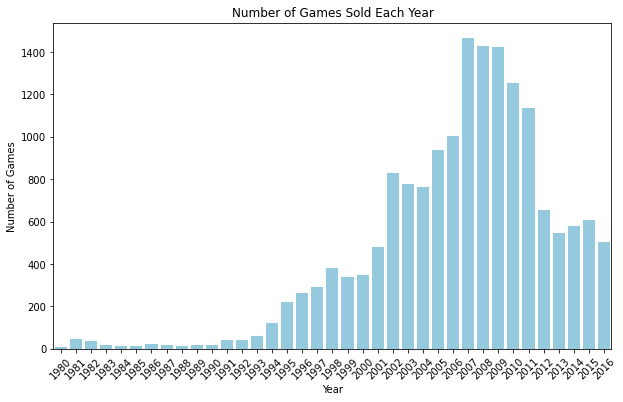

In [11]:
# Group the DataFrame by 'year_of_release' and count the number of games for each year
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='year_of_release', y='name', data=games_per_year, color='skyblue')
plt.title('Number of Games Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Perfect visualization</div>

In [12]:
# Group platforms by their total sales to find the most popular platforms
platform_total_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# Group them further by the ones I deem popular enough
top_platforms = platform_total_sales.head(24)
display(platform_total_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

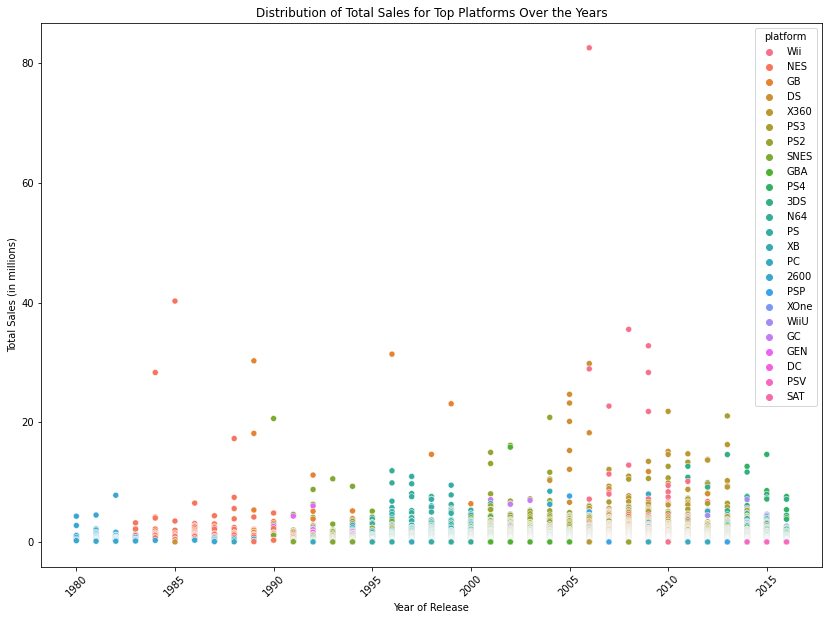

In [13]:
top_platforms = games[games['platform'].isin(top_platforms.index)]

# Create a boxplot to visualize the distribution of sales for each year
plt.figure(figsize=(14, 10))
sns.scatterplot(x='year_of_release', y='total_sales', hue='platform', data=top_platforms)
plt.title('Distribution of Total Sales for Top Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Very good analysis
</div>

Looks like it usually takes around 7-10 years for platforms to fade

I'll deem everything before 2014* as irrelevant

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.~~
    
~~Please change condition for year_of_release After the correction you will have another results of analysis So please change conclusions if it is necessary I will check only correctness of the code~~

</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Great
</div>

In [14]:
# Removing data before 2014*
games_filtered = games[games['year_of_release'] >= 2014]

In [15]:
platform_total_sales2 = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms2 = platform_total_sales2.head(11)

display(top_platforms2)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

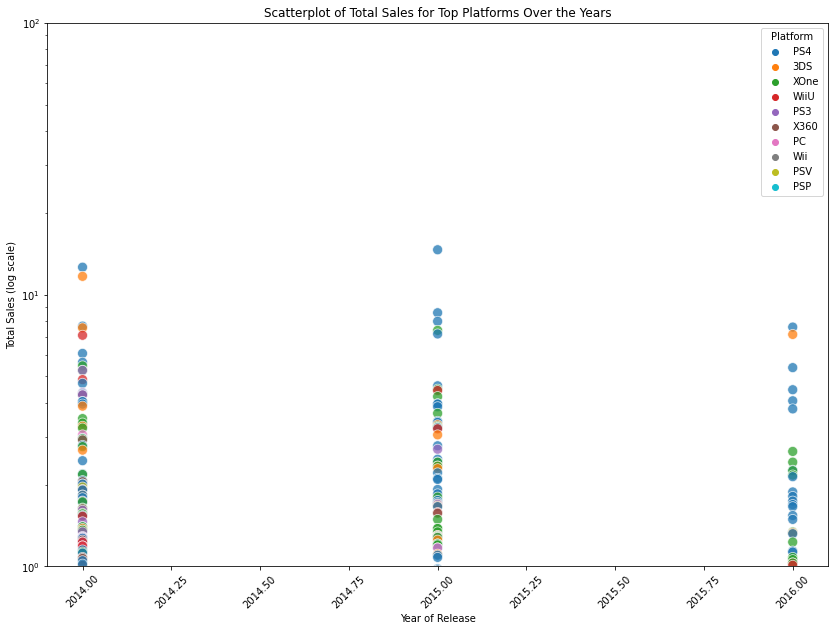

In [16]:
top_platforms2 = games_filtered[games_filtered['platform'].isin(top_platforms2.index)]

plt.figure(figsize=(14, 10))
sns.scatterplot(x='year_of_release', y='total_sales', hue='platform', data=top_platforms2, alpha=.75, s=100)
plt.yscale('log')  # Use log scale for better visualization
plt.ylim(1e0, 1e2)
plt.title('Scatterplot of Total Sales for Top Platforms Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (log scale)')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1, 1))
plt.show()

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
May be here it is better to use lineplot instead of scatterplot </div>

PS4 and XOne are currently leading. The 3DS is also up there with the leading platforms while having fewer games released, but it is nearing the end of its life cycle. The PS3 and the X360, the previous leading sellers are currently fading away. Also worth noting that PC is a platform that we know will not fade away but is less accessible than the other platforms.

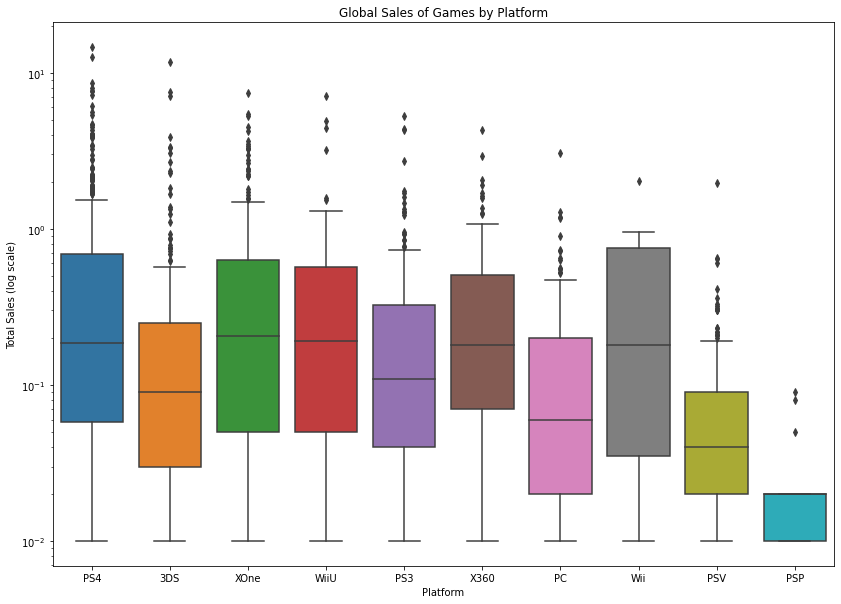

In [17]:
# Create a box plot for global sales broken down by platform
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=games_filtered)
plt.yscale('log')  # Use log scale for better visualization
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (log scale)')
plt.show()

The average sales of games on the current popular platforms are very similar and the difference in sales isn't significant. In the current generation of consoles, the XOne has higher average sales than the rest but PS4 has the highest outliers.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Super boxplots Possible that after choosing right relevant period you will need to change some conclusions
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~HERE AND FURTHER
Once the appropriate period has been determined, all analysis steps must be completed for this period. Please use games_filtered instead of games.~~

</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Fixed
</div>

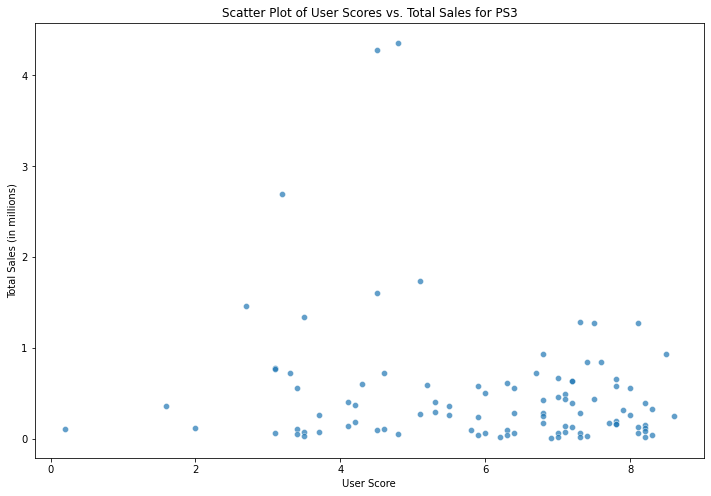

Correlation between User Scores and Total Sales for PS3: -0.17


In [18]:
# Filter data for the PS3 platform
ps3_data = games_filtered[games_filtered['platform'] == 'PS3']

# Create a scatter plot for user scores vs. total sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', y='total_sales', data=ps3_data, alpha=0.7)
plt.title('Scatter Plot of User Scores vs. Total Sales for PS3')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Calculate the correlation between user scores and total sales
user_sales_correlation = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f"Correlation between User Scores and Total Sales for PS3: {user_sales_correlation:.2f}")

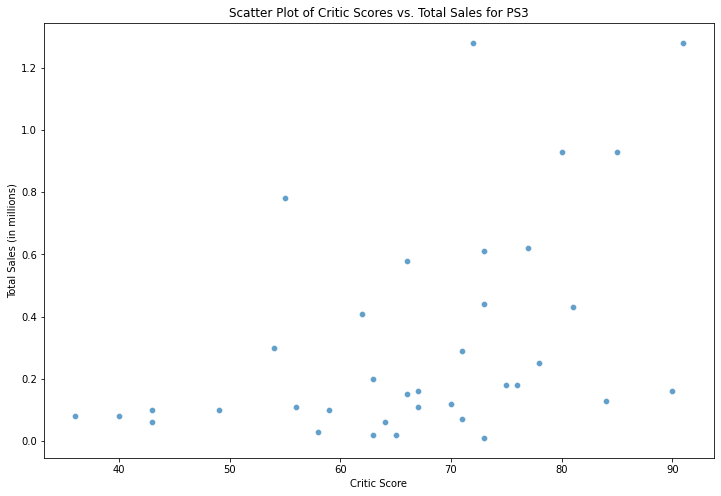

Correlation between Critic Scores and Total Sales for PS3: 0.45


In [19]:
# Create a scatter plot for critic scores vs. total sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_data, alpha=0.7)
plt.title('Scatter Plot of Critic Scores vs. Total Sales for PS3')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

# Calculate the correlation between critic scores and total sales
critic_sales_correlation = ps3_data['critic_score'].corr(ps3_data['total_sales'])
print(f"Correlation between Critic Scores and Total Sales for PS3: {critic_sales_correlation:.2f}")

The critic rating has a higher correlation to sales than the user rating but it's still not very high. Low-Mid correlation

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
You are right You also can use pairplot 
</div>

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000


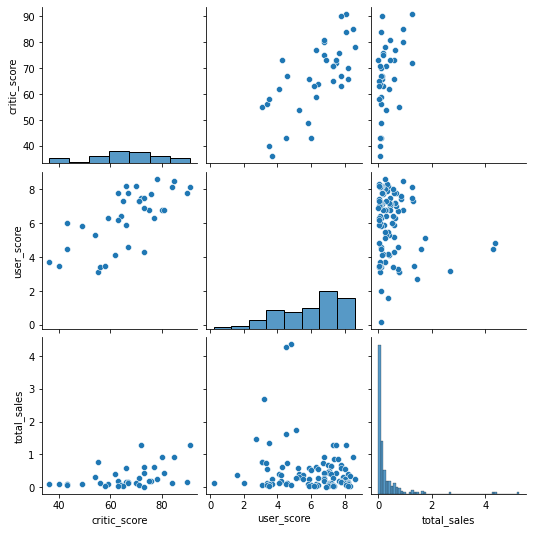

In [20]:
#REVIEWER CODE
display(ps3_data[['critic_score', 'user_score', 'total_sales']].corr())
sns.pairplot(ps3_data[['critic_score', 'user_score', 'total_sales']]);

In [21]:
# Identify the 20 most popular games based on total sales
top_games = games_filtered.sort_values(by='total_sales', ascending=False).head(20)

# For each game, determine the platform
top_games_platforms = games_filtered[games_filtered['name'].isin(top_games['name'])][['name', 'platform']]

In [22]:
print(top_games_platforms)

                                           name platform
31                    Call of Duty: Black Ops 3      PS4
42                           Grand Theft Auto V      PS4
47    Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS
77                                      FIFA 16      PS4
87                 Star Wars Battlefront (2015)      PS4
92               Call of Duty: Advanced Warfare      PS4
94                                      FIFA 17      PS4
96          Super Smash Bros. for Wii U and 3DS      3DS
99                    Call of Duty: Black Ops 3     XOne
105                                   Fallout 4      PS4
108                            Pokemon Sun/Moon      3DS
110                                Mario Kart 8     WiiU
143                                     FIFA 15      PS4
154                                     Destiny      PS4
165                          Grand Theft Auto V     XOne
171                  Uncharted 4: A Thief's End      PS4
179              Call of Duty: 

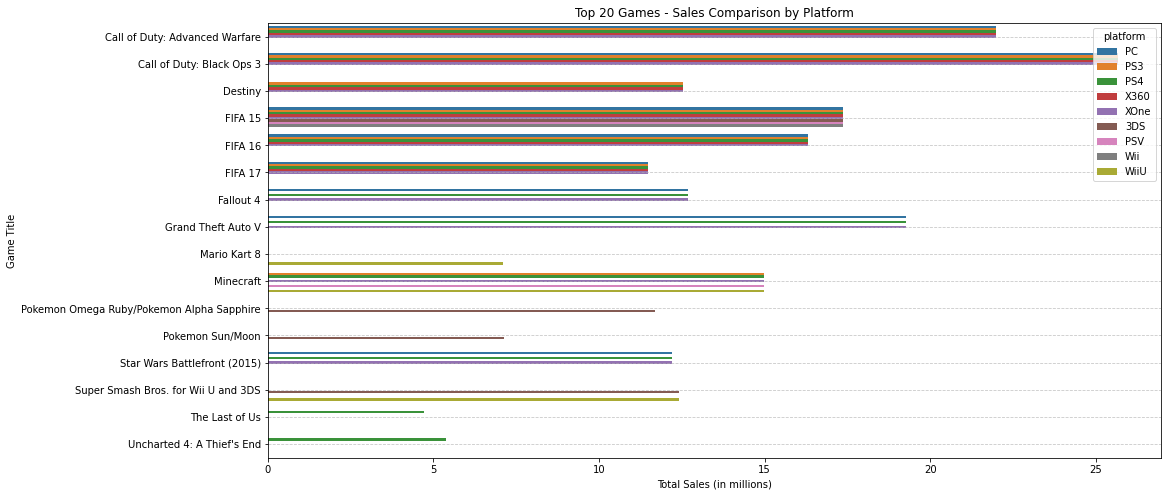

In [23]:
merged_data = pd.merge(top_games_platforms, games_filtered[['name', 'total_sales']], on='name')

# Create a bar chart to compare sales by platform
plt.figure(figsize=(16, 8))
sns.barplot(x='total_sales', y='name', hue='platform', data=merged_data.groupby(['name', 'platform']).sum().reset_index(), ci=None)
plt.title('Top 20 Games - Sales Comparison by Platform')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Game Title')
plt.grid(axis='y', linestyle='--', alpha=.7)
plt.show()

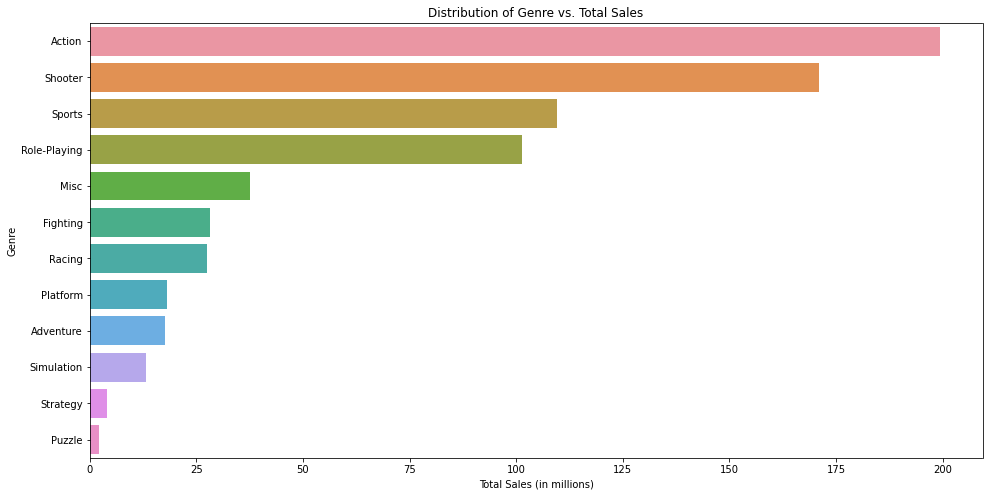

In [24]:
# Create a bar plot to visualize the distribution of genre vs. sales
plt.figure(figsize=(16, 8))
sns.barplot(x='total_sales', y='genre', data=games_filtered.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False))
plt.title('Distribution of Genre vs. Total Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Genre')
plt.show()

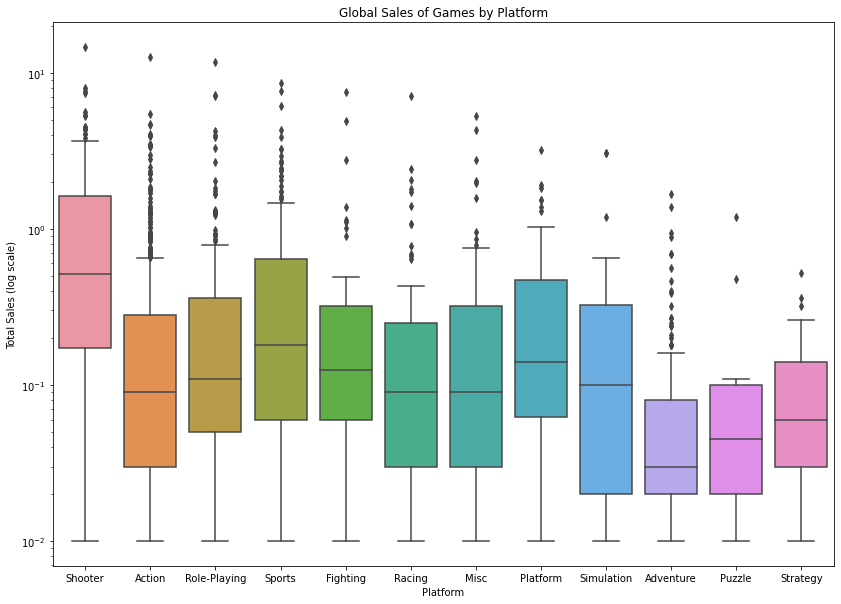

In [25]:
# Create a box plot for global sales broken down by genre
plt.figure(figsize=(14, 10))
sns.boxplot(x='genre', y='total_sales', data=games_filtered)
plt.yscale('log')  # Use log scale for better visualization
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (log scale)')
plt.show()

**Bar:** The "Action" genre is kind of broad and can include many other genres like shooter, role-playing, etc.. The genres with the highest sales tend to be dynamic and active and the genres with the lowest sales tend to be calmer.

**Boxplot:** Shooter seems to be on average the most popular yet Action has the most sales

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add boxplots of total sales by genre. Sometimes there may be outliers, and it is better to compare the median rather than the sum of total sales.~~

</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super Great conclusion
</div>

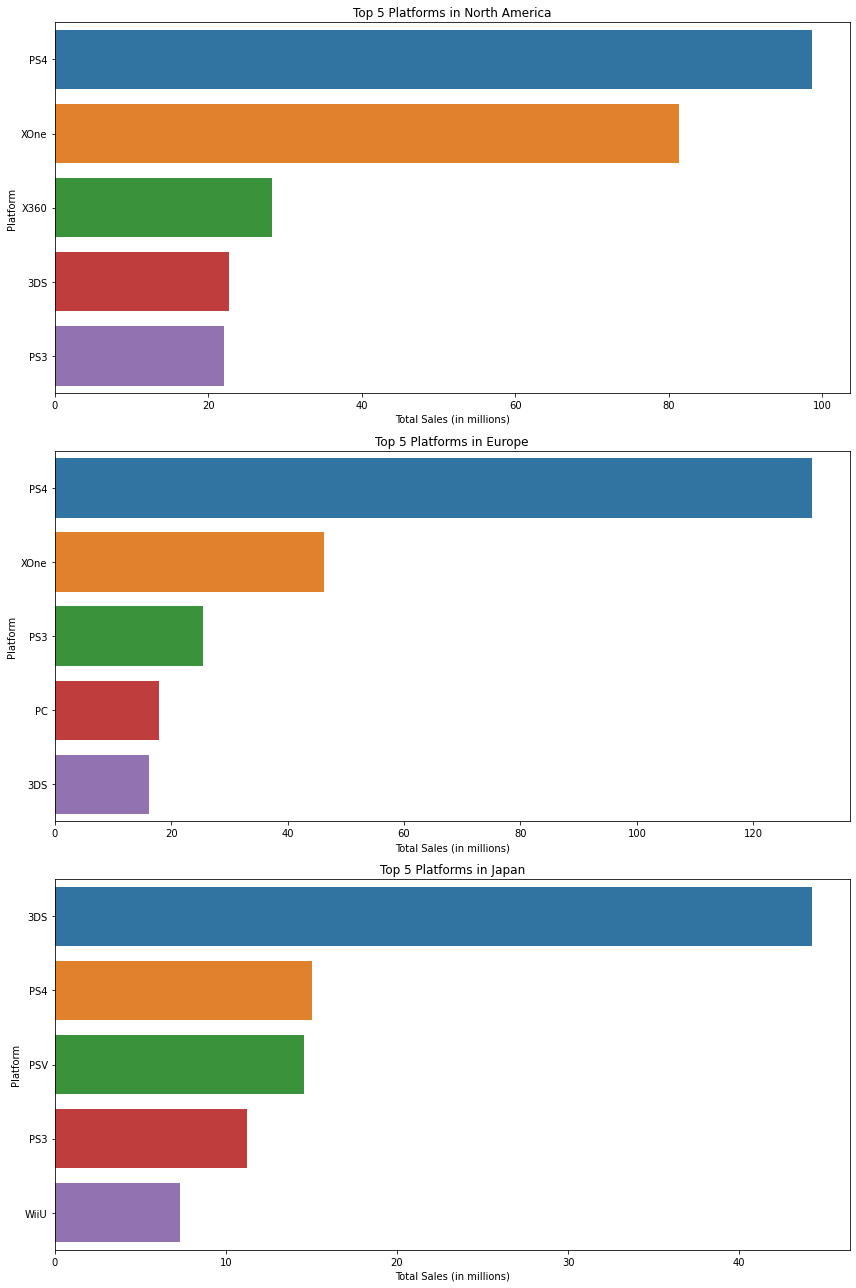

In [26]:
# Filter the data for each region
na_data = games_filtered[['platform', 'na_sales']].groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_data = games_filtered[['platform', 'eu_sales']].groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_data = games_filtered[['platform', 'jp_sales']].groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# North America
sns.barplot(x='na_sales', y='platform', data=na_data, ax=axes[0])
axes[0].set_title('Top 5 Platforms in North America')
axes[0].set_xlabel('Total Sales (in millions)')
axes[0].set_ylabel('Platform')

# Europe
sns.barplot(x='eu_sales', y='platform', data=eu_data, ax=axes[1])
axes[1].set_title('Top 5 Platforms in Europe')
axes[1].set_xlabel('Total Sales (in millions)')
axes[1].set_ylabel('Platform')

# Japan
sns.barplot(x='jp_sales', y='platform', data=jp_data, ax=axes[2])
axes[2].set_title('Top 5 Platforms in Japan')
axes[2].set_xlabel('Total Sales (in millions)')
axes[2].set_ylabel('Platform')

plt.tight_layout()
plt.show()

America has the most total sales, japan has the least. Japan tends to get more sales from companies that are based in Japan, such as Sony and Nintendo. NA and EU's most popular platform is the PS4 and the XOne is much more popular in NA than EU.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Perfect 
</div>

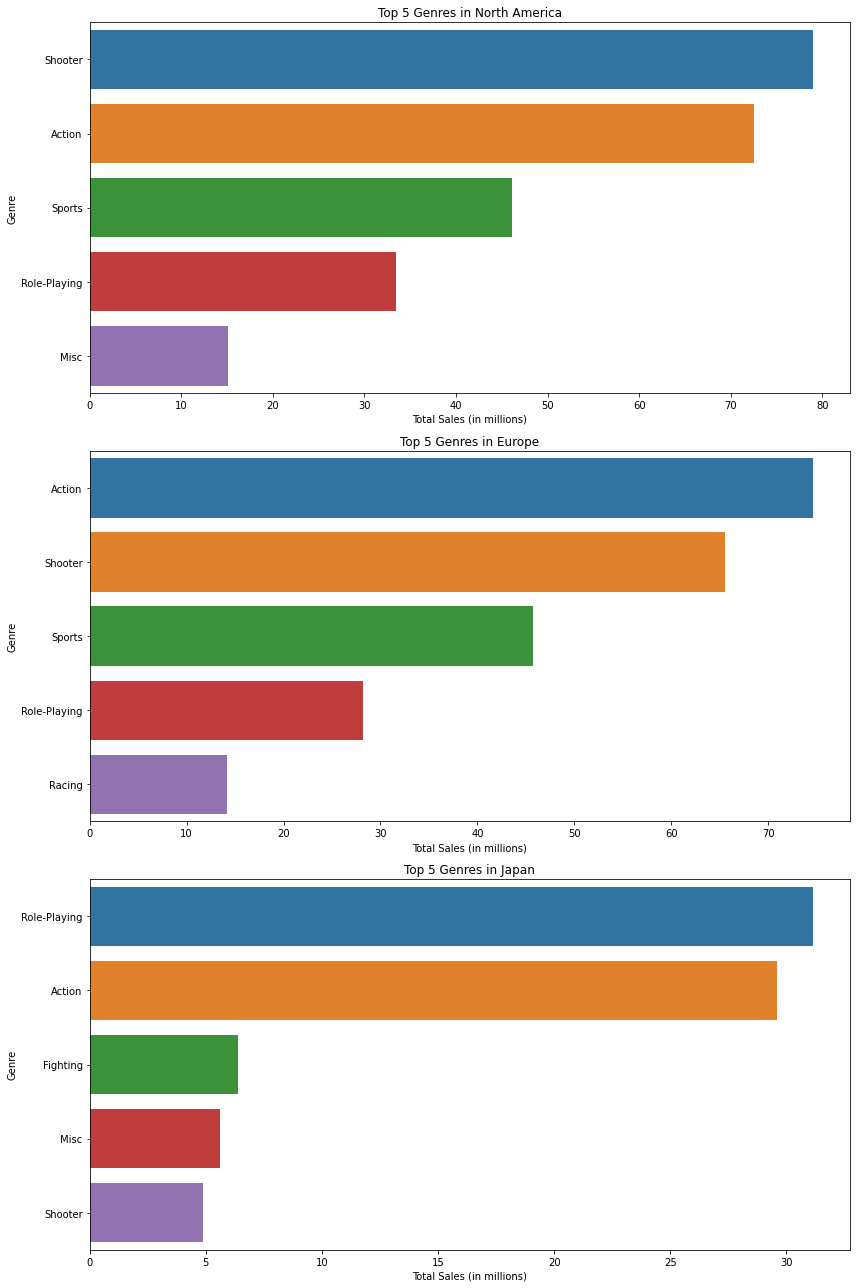

In [27]:
# Filter the data for each region
na_genre_data = games_filtered[['genre', 'na_sales']].groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
eu_genre_data = games_filtered[['genre', 'eu_sales']].groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
jp_genre_data = games_filtered[['genre', 'jp_sales']].groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# North America
sns.barplot(x='na_sales', y='genre', data=na_genre_data, ax=axes[0])
axes[0].set_title('Top 5 Genres in North America')
axes[0].set_xlabel('Total Sales (in millions)')
axes[0].set_ylabel('Genre')

# Europe
sns.barplot(x='eu_sales', y='genre', data=eu_genre_data, ax=axes[1])
axes[1].set_title('Top 5 Genres in Europe')
axes[1].set_xlabel('Total Sales (in millions)')
axes[1].set_ylabel('Genre')

# Japan
sns.barplot(x='jp_sales', y='genre', data=jp_genre_data, ax=axes[2])
axes[2].set_title('Top 5 Genres in Japan')
axes[2].set_xlabel('Total Sales (in millions)')
axes[2].set_ylabel('Genre')

plt.tight_layout()
plt.show()

The Action genre is in the top two most popular genres in all three regions. Shooter is also in the top two for NA and EU and Role-Playing is the most popular genre in Japan.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Right
</div>

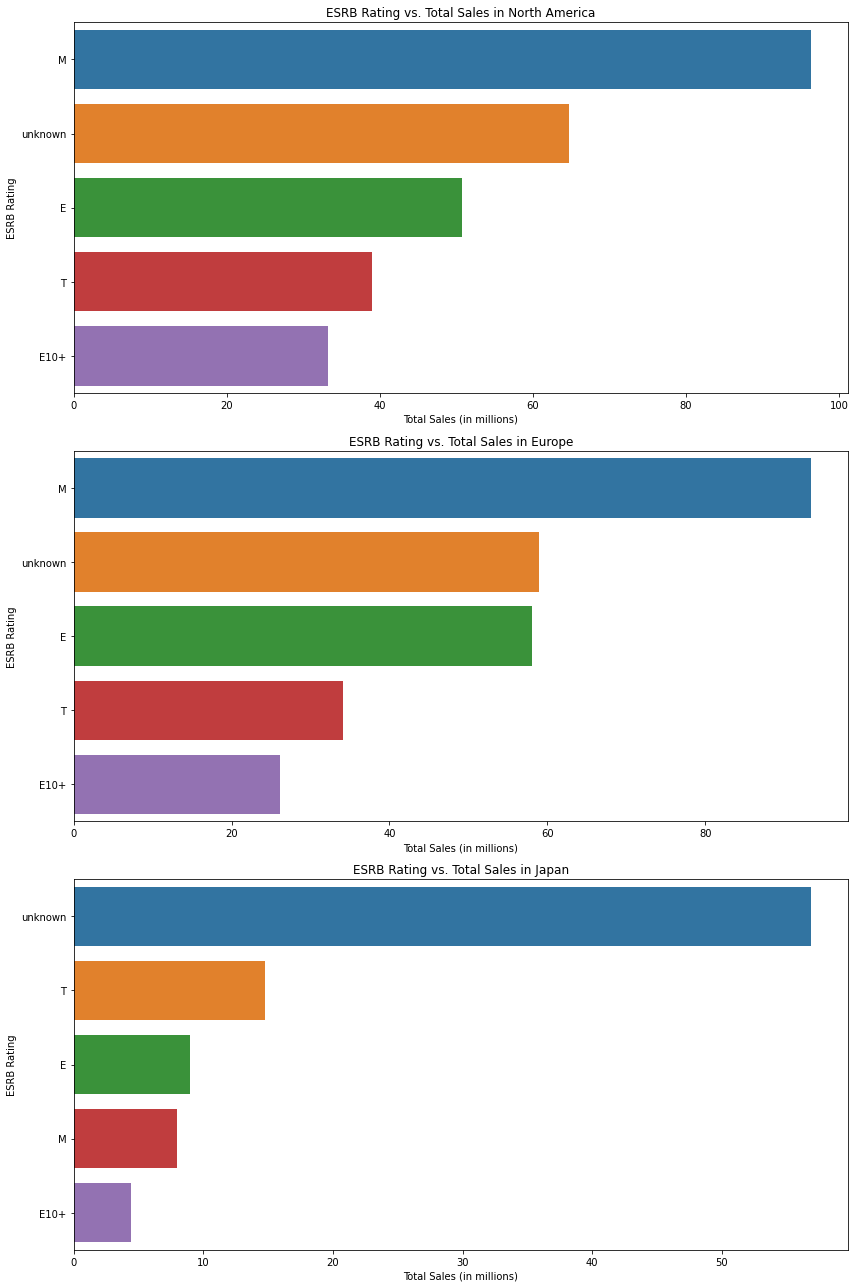

In [28]:
# Group the data by ESRB rating and calculate total sales for each region
esrb_na_data = games_filtered.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
esrb_eu_data = games_filtered.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
esrb_jp_data = games_filtered.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Create subplots for each region
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# North America
sns.barplot(x='na_sales', y='rating', data=esrb_na_data, ax=axes[0])
axes[0].set_title('ESRB Rating vs. Total Sales in North America')
axes[0].set_xlabel('Total Sales (in millions)')
axes[0].set_ylabel('ESRB Rating')

# Europe
sns.barplot(x='eu_sales', y='rating', data=esrb_eu_data, ax=axes[1])
axes[1].set_title('ESRB Rating vs. Total Sales in Europe')
axes[1].set_xlabel('Total Sales (in millions)')
axes[1].set_ylabel('ESRB Rating')

# Japan
sns.barplot(x='jp_sales', y='rating', data=esrb_jp_data, ax=axes[2])
axes[2].set_title('ESRB Rating vs. Total Sales in Japan')
axes[2].set_xlabel('Total Sales (in millions)')
axes[2].set_ylabel('ESRB Rating')

plt.tight_layout()
plt.show()

Games with the M rating are the most popular in NA and EU and the most popular in Japan is "unknown" which is also in second place for the other regions.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~Please double check the conclusion for Japan after filling in the missing values for rating with "unknown"~~
</div>

In [29]:
# Extract user ratings for Xbox One and PC
xbox_one_ratings = games_filtered[games_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games_filtered[games_filtered['platform'] == 'PC']['user_score'].dropna()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f'Test Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings.")

Test Statistic: 1.5778
P-value: 0.1160
Fail to reject the null hypothesis. There is no significant difference in average user ratings.


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Code is correct But the result will be different after choosing relevant period
</div>

H0 = There isn't a significant difference in the average user rating between XOne and PC platforms

H1 = There is a significant enough difference in the average user rating between XOne and PC platforms

In [30]:
# Extract user ratings for Action and Sports genres
action_ratings = games_filtered[games_filtered['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games_filtered[games_filtered['genre'] == 'Sports']['user_score'].dropna()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f'Test Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average user ratings between Action and Sports genres.")

Test Statistic: 8.3846
P-value: 0.0000
Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres.


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
The code is correct. But the result may differ after fixing the relevant  period.
</div>

H0 = There isn't a significant difference in the average user ratings between Action and Sports genres

H1 = There is a significant enough difference in the average user ratings between Action and Sports genres

I set the previous two tests' alpha value at .05 because it is a large dataset and it is commonly set at .05.

<div class="alert alert-info" style="border-left: 7px solid blue">

**Conclusion:**

**Current Generation Consoles:**
The current generation includes Xbox One (XOne), PlayStation 4 (PS4), and potentially a new Nintendo platform (based on the current Nintendo console nearing the end of its life cycle). Focus on optimizing gaming experiences for these platforms to stay competitive in the market.

**PC Gaming:**
Acknowledge the enduring presence of PC gaming. While consoles have their audience, PC gaming has a longstanding and dedicated user base. Continue to support and optimize games for PC to cater to this important segment.

**Popular Game Franchise:**
The Call of Duty and FIFA franchise remains consistently popular across multiple platforms. Consider collaborations or marketing strategies to leverage the franchises' popularity and engage a wide player base.

**Popular Genres in NA and EU:**
Action and shooters are the most popular genres in North America (NA) and Europe (EU). Develop and promote games in these genres to align with the preferences of the target audience in these regions.

**Popular Genre in JP:**
Role-playing games (RPGs) and action are the most widely popular genres in Japan (JP). Tailor game development and marketing strategies to cater to the preferences of the Japanese gaming audience, emphasizing RPG and action elements.

**ESRB Rating M:**
ESRB rating M (Mature) is the most accessible and popular rating. Continue to create games with ESRB rating M to appeal to a wider audience.

</div>

<div class="alert alert-info" style="border-left: 7px solid blue">

**Suggestions:**

**Global Platform Accessibility:**
Ensure that the Ice online store is optimized for global accessibility, supporting purchases and transactions across different platforms, including Xbox One, PS4, PC, and potentially new Nintendo platforms.

**Franchise Promotion and Bundles:**
Leverage the popularity of franchises like Call of Duty and FIFA by promoting and bundling games across platforms. Consider creating special bundles that include titles from well-known franchises to attract a broader audience.

**Regional Marketing Strategies:**
Implement regional marketing strategies that align with gaming preferences in different parts of the world. Tailor promotional campaigns to highlight games in popular genres for each region, emphasizing the diverse offerings available on Ice.

**ESRB Rating Awareness:**
Emphasize the ESRB rating M (Mature) in product descriptions and marketing materials. Highlighting the accessibility of games can make Ice a preferred destination for a wide range of customers.

**Global Community Engagement:**
Foster a global gaming community on the Ice platform. Encourage user reviews, ratings, and discussions on the website to create an engaging space for gamers to share experiences and recommendations.

**Responsive Customer Support:**
Offer responsive customer support that caters to the diverse needs of a global customer base. Ensure that customer support representatives are knowledgeable about regional preferences and can assist users in multiple languages.

**Adaptability to Market Trends:**
Stay informed about global gaming trends and adapt the product catalog accordingly. Regularly update the game selection to include popular titles and emerging trends that resonate with the diverse interests of the worldwide gaming community.

**Secure and Efficient Transactions:**
Prioritize secure and efficient online transactions for customers worldwide. Implement user-friendly payment options, currency conversions, and localized pricing to enhance the overall shopping experience.

**Collaboration with Game Developers:**
Collaborate with game developers and publishers to secure exclusive deals or promotions. Establishing strong partnerships can lead to unique offerings that attract customers to the Ice platform.

**Localization Efforts:**
Invest in localization efforts to provide a seamless experience for users from different regions. This includes translating website content, product descriptions, and customer support services into multiple languages.

</div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
Great conclusion But you may have to change it 
</div>

<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> Only a few minor changes to the conclusion
</div> 

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
Bravo, Cooper Now your project is just amazing Thank you very much for your time and efforts
</div>